In [245]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

In [226]:
def euler(M, N, T, S, sigma, mu, beta):
    dt = T/M
    S_values = np.zeros((N, M))
    # S_values[:, 0] = np.random.randint(S-S//2, S+S//2, size=(N))
    S_values[:, 0] = S

    sharedZ = np.random.normal(loc=0, scale=1, size=M)
    sharedZ = np.ones_like(sharedZ)

    for n in range(N):
        for m in range(1, M):
            Zm = random.gauss(0, 1)
            S_values[n,m] = (
                S_values[n,m-1] + 
                mu*S_values[n,m-1]*dt + 
                sigma*S_values[n,m-1]*math.sqrt(dt)*Zm +
                beta[m]*sigma*math.sqrt(dt)*sharedZ[m]*S_values[n,m-1]
            )

    return S_values

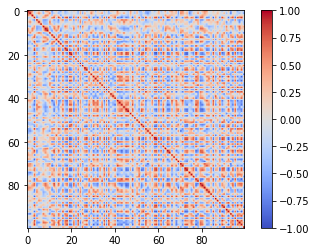

In [256]:
# fig, ax1 = plt.subplots(figsize=(12,4))
# ax2 = ax1.twinx()

M = 1000
mu = 0.02
beta = np.round(np.arange(M)//250)%2
beta = np.where(beta==0, -1, beta)
beta = np.sin(5*np.linspace(0,np.pi,M))
beta = euler(M=M, N=1, T=1, S=1, sigma=5, mu=0, beta=np.zeros(shape=M))[0]
beta = np.log(beta) - np.roll(np.log(beta), shift=1)
beta[0] = 0
beta *= 2

beta = np.zeros(M)
# beta *= 0.2
# ax2.plot(beta)
# plt.show()

# market1 = np.mean(euler(M=M, N=10, T=1, S=100, sigma=0.3, mu=0.02, beta=beta),axis=0)
# market2 = np.mean(euler(M=M, N=20, T=1, S=100, sigma=0.3, mu=0.02, beta=beta),axis=0)
# market3 = np.mean(euler(M=M, N=50, T=1, S=100, sigma=0.3, mu=0.02, beta=beta),axis=0)
# market4 = np.mean(euler(M=M, N=100, T=1, S=100, sigma=0.3, mu=0.02, beta=beta),axis=0)

# plt.plot(euler(M=M, N=100, T=1, S=100, sigma=0.3, mu=0.02, beta=beta).T)

df = pd.DataFrame(euler(M=M, N=100, T=1, S=100, sigma=0.3, mu=0.02, beta=beta).T)

# ax1.set_yscale("Log")
# ax1.plot(market1.T, color="black", alpha=0.2)
# ax1.plot(market2.T, color="black", alpha=0.2)
# ax1.plot(market3.T, color="black", alpha=0.2)
# ax1.plot(market4.T, color="black", alpha=0.2)
# plt.show()

plt.imshow(df.corr(), vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar()



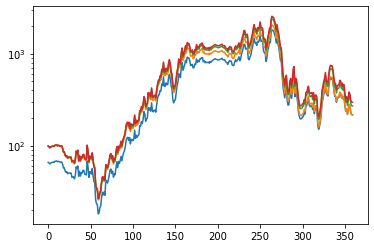

In [163]:
mu = 0.5
market = euler(M=360, N=1, T=1, S=100, sigma=0.3, mu=mu, beta=beta)[0]
futures = market * (1 + mu*(np.arange(360)[::-1]/360))
futures2 = market * (1 + mu*(np.arange(360,360+360)[::-1]/(360+360)))
futures3 = market * (1 + mu*(np.arange(1000,360+1000)[::-1]/(360+1000)))

plt.plot(market)
plt.plot(futures)
plt.plot(futures2)
plt.plot(futures3)
plt.yscale("log")

In [160]:
arr = np.array([0,1,np.nan])

np.where((arr<=0) | np.isnan(arr), 0.1, arr)

array([0.1, 1. , 0.1])